In [4]:
from PIL import Image
import os
from tqdm import tqdm
import shutil
import numpy as np

from matplotlib import pylab as plt
%matplotlib inline

In [5]:
def scale(image, factor):
    image = image.copy()
    
    max_size = max(image.size)
    new_max_size = int(max_size * factor)
    
    if image.size[0] <= image.size[1]:
        image.thumbnail((image.size[0], new_max_size), Image.BICUBIC)
    else:
        image.thumbnail((new_max_size, image.size[1]), Image.BICUBIC)
        
    return image

---

(178, 218)


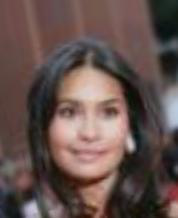

In [7]:
path = './Downloads/celebA/'
name = np.random.choice(os.listdir(path))

image = Image.open(os.path.join(path, name))
print(image.size)
image

In [8]:
import jsonlines

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

from IPython import display

In [9]:
quick_draw_path = './Downloads/quick_draw'

strokes = []
n_images_by_file = 10000

for name in tqdm(os.listdir(quick_draw_path)):
    reader = jsonlines.open(os.path.join(quick_draw_path, name))
    
    i = 0
    for item in reader:
        strokes.extend(item['drawing'])
        
        i += 1
        if i > n_images_by_file:
            break

100%|██████████| 8/8 [00:03<00:00,  2.26it/s]


In [21]:
def central_crop(image, new_width, new_height):
    image = image.copy()
    
    width, height = image.size
    
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    image = image.crop((left, top, right, bottom))
    
    return image

In [22]:
def scale(image, factor):
    image = image.copy()
    
    max_size = max(image.size)
    new_max_size = int(max_size * factor)
    
    if image.size[0] <= image.size[1]:
        image.thumbnail((image.size[0], new_max_size), Image.BICUBIC)
    else:
        image.thumbnail((new_max_size, image.size[1]), Image.BICUBIC)
        
    return image

5


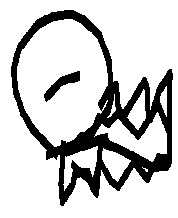

4


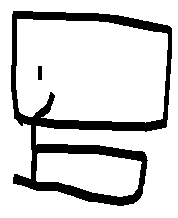

2


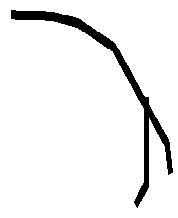

4


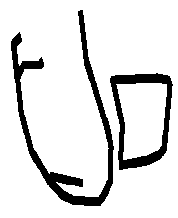

4


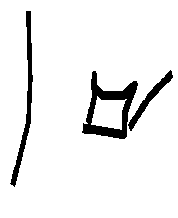

5


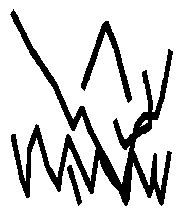

4


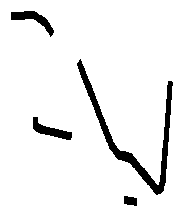

4


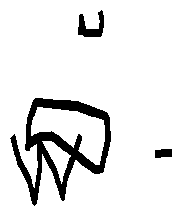

6


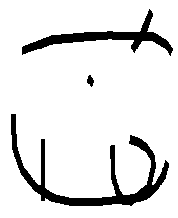

5


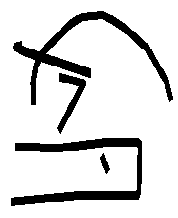

5


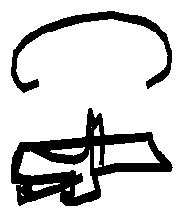

4


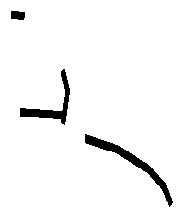

4


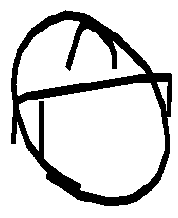

4


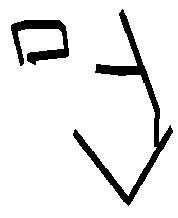

4


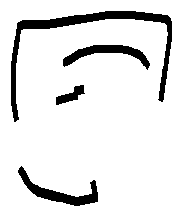

5


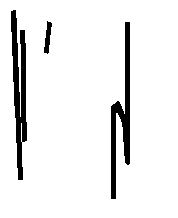

6


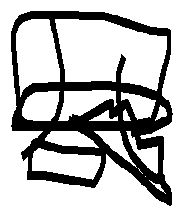

5


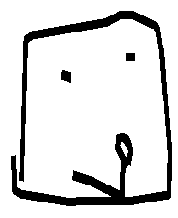

6


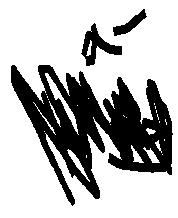

4


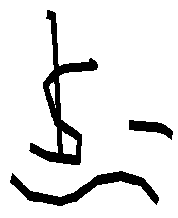

4


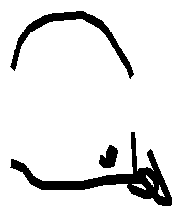

4


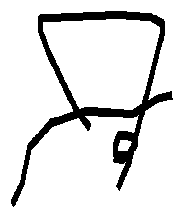

2


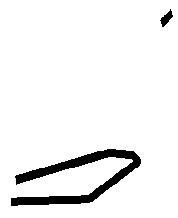

5


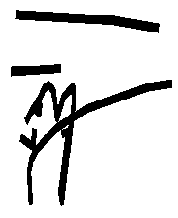

5


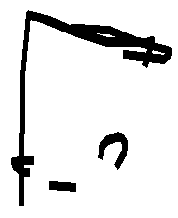

4


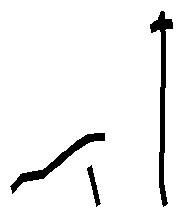

3


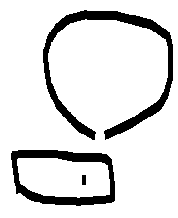

6


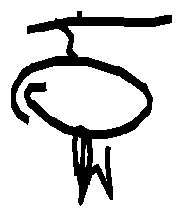

4


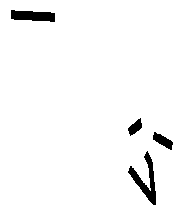

4


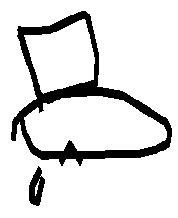

3


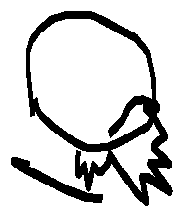

6


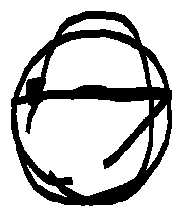

4


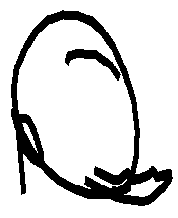

4


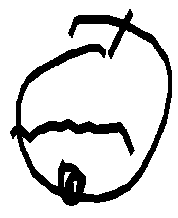

6


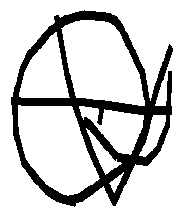

3


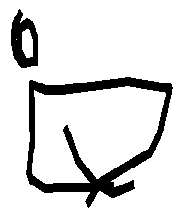

3


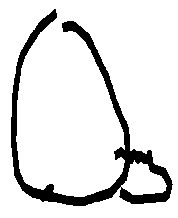

6


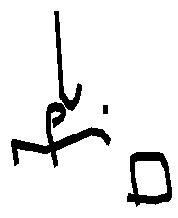

4


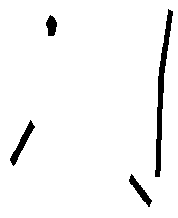

4


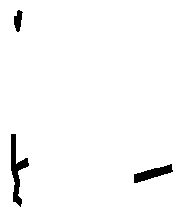

3


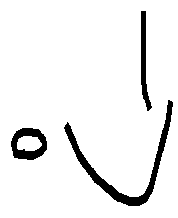

5


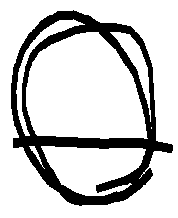

4


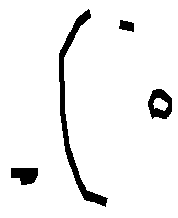

4


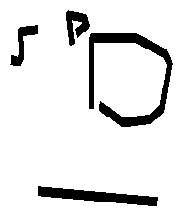

4


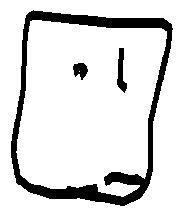

5


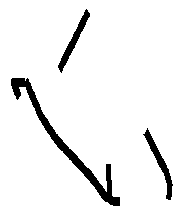

3


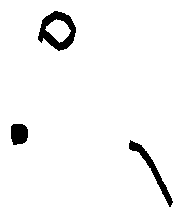

5


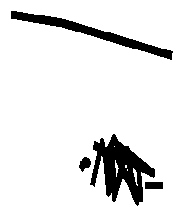

4


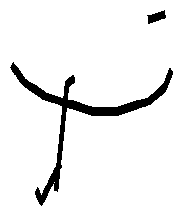

3


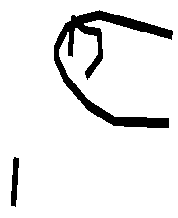

In [23]:
target_width, target_height = 178, 218
min_stroke_width = 8

for _ in range(50):
    
    fig = Figure()
    canvas = FigureCanvas(fig)
    ax = fig.gca()

    ax.axis('off')


    n_strokes = int(np.random.normal(5, 1))
    print(n_strokes)

    for _ in range(n_strokes):
        stroke_index = np.random.randint(0, len(strokes))
        stroke_width = np.random.randint(min_stroke_width, min_stroke_width + 2)
        stroke = strokes[stroke_index][:int(len(strokes[stroke_index]) * 1)]
        ax.plot(*stroke, color='black', lw=stroke_width)

    canvas.draw()       # draw the canvas, cache the renderer
    width, height = fig.get_size_inches() * fig.get_dpi()
    image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)
    image = Image.fromarray(image)
    
    
#     image = scale(image, 0.75)
    image = image.resize((int(1.25 * target_width), int(1.25 * target_height)))
    image = central_crop(image, target_width, target_height)
    
    
#     plt.imshow(image)
    display.display(image)